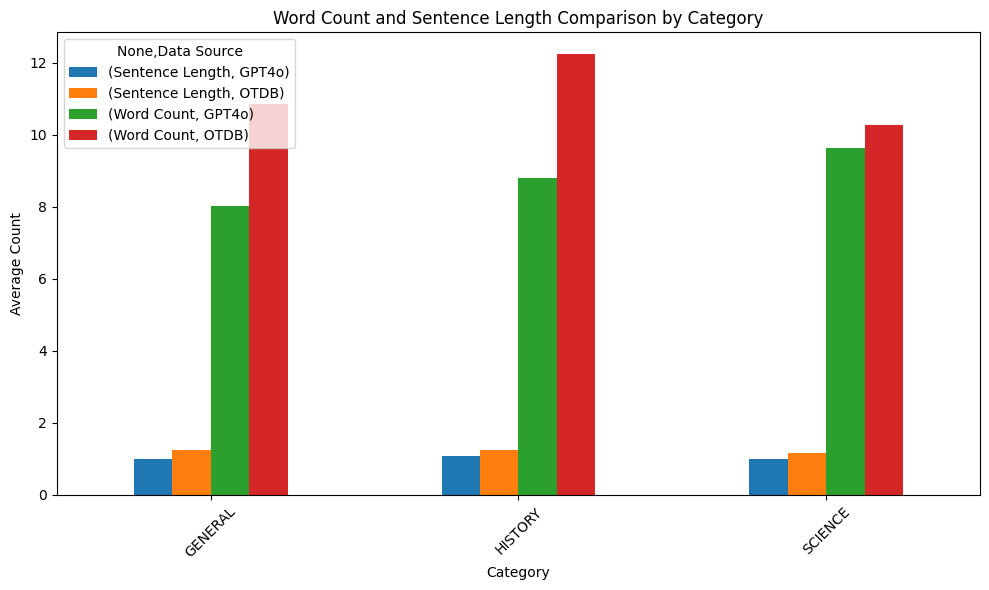

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from file_utils import load_questions_from_file
from metric_utils import calculate_word_count_and_sentence_length


otdbFiles = ["OTDB_HISTORY.json", "OTDB_GENERAL_KNOWLEDGE.json", "OTDB_SCIENCE_NATURE.json"]
gpt4oPromt1Files = ["GPT4o_HISTORY_PROMT1.json", "GPT4o_GENERAL_KNOWLEDGE_PROMT1.json", "GPT4o_SCIENCE_NATURE_PROMT1.json"]

data = {
    "Category": [],
    "Word Count": [],
    "Sentence Length": [],
    "Data Source": []  # OTDB or GPT4o
}

for file_list, source in zip([otdbFiles, gpt4oPromt1Files], ["OTDB", "GPT4o"]):
    for file in file_list:
        questions = load_questions_from_file(file)
        category = file.split("_")[1].replace(".json", "").replace("_", " ")

        total_word_count = 0
        total_sentence_length = 0
        question_count = len(questions)

        for question in questions:
            word_count, sentence_length = calculate_word_count_and_sentence_length(question.question)
            total_word_count += word_count
            total_sentence_length += sentence_length

        avg_word_count = total_word_count / question_count
        avg_sentence_length = total_sentence_length / question_count

        data["Category"].append(category)
        data["Word Count"].append(avg_word_count)
        data["Sentence Length"].append(avg_sentence_length)
        data["Data Source"].append(source)

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

df_pivot = df.pivot_table(index="Category", columns="Data Source", values=["Word Count", "Sentence Length"], aggfunc='mean')
df_pivot.plot(kind="bar", ax=ax)

plt.title("Word Count and Sentence Length Comparison by Category")
plt.xlabel("Category")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


GPT4o Prompt1 seems to generate more concise questions compared to OTDB, which might make the GPT-generated questions easier to process. However, this could also indicate a trade-off between conciseness and potential complexity or depth of information.